# **Prediction using Supervised Machine Learning**
## **Author: SREEJITA BHAUMIK**
### **Task done for the Data Science and Business Analytics internship under the GRIP by The Sparks Foundation (December 2020)**
#### **To predict the percentage obtained by a student based on number of hours studied using a simple linear regression model**


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Understanding the shape of the dataset
data.shape

(25, 2)

In [4]:
#Looking for null values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#Describing the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting visualisations of the two variables

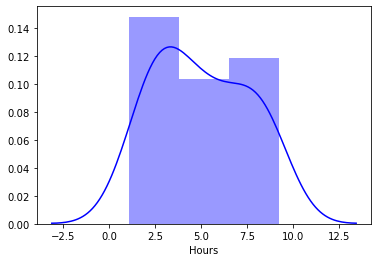

In [6]:
sns.distplot(data['Hours'],color='blue')
plt.show()

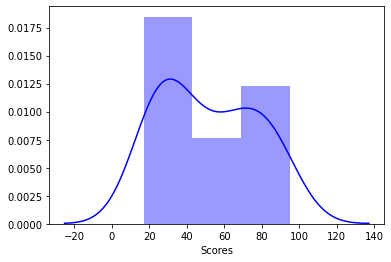

In [7]:
sns.distplot(data['Scores'],color='blue')
plt.show()

## Seperating dependent and independent variable

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Plotting a scatter plot to visualise the distribution of scores

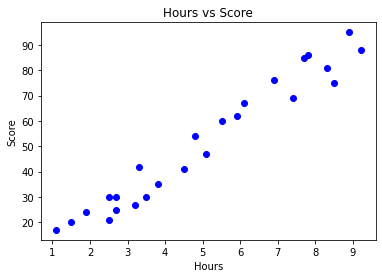

In [9]:
plt.scatter(X, y, color = 'blue')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

## Spliting the dataset into train and test set

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the Linear Regression model on the dataset

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [12]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

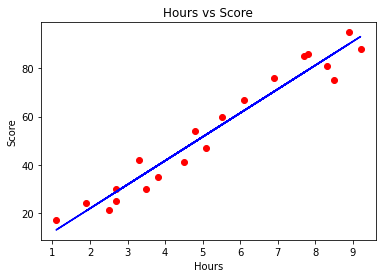

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

## Visualising the Test set results

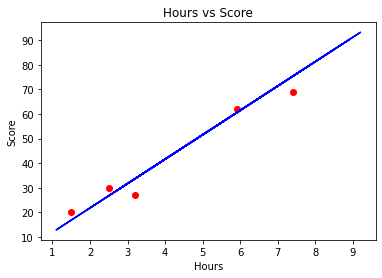

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

## Comparing the predicted scores with actual test set scores

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicted score of a student if he/she studies for 9.25 hrs/ day

In [16]:
hours = 9.25
regressor.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(regressor.predict([[9.25]])))

No of Hours = 9.25
Predicted Score = [93.69173249]


## Evaluating the model performance using R-squared value

In [17]:
from sklearn.metrics import r2_score
print("R squared value is:", r2_score(y_test, y_pred))

R squared value is: 0.9454906892105356
